Terminal commands:
muscle -in seqs.fa -out seqs.aligned.fa
FastTree -nt <seqs.aligned.fa > tree.nwk

The muscle command took the input of the sequences and aligned them to each other, outputting a seqs.aligned.fa file.
The FastTree command took the aligned sequence file from above and, using their relation to one another, generated a likely phylogenetic tree as the tree.nwk output.

In [92]:
%matplotlib inline

from Bio import Phylo
from io import StringIO

tree = Phylo.read("tree.nwk", "newick")

Phylo.draw_ascii(tree, column_width = 125)

 , hu.39
 |
 | rh.50
 |
 |_ rh.57
 |
 | rh.51
 |
 | rh.49
 |
_, rh.53
 |
 | rh.64
 |
 , rh.61
 |
 | __ rh.58
 ||
 ||                                                    , pi.2
 ||                  __________________________________|
 ||                 |                                  |_ pi.3
 ||                 |                                  |
 ||                 |                                  | pi.1
 ||                 |
 ||                 |                   , rh.10
 ||              ___|                 __|
 ||             |   |                |  |, bb.1
 ||             |   |                |  ||
 ||             |   |    ____________|   | bb.2
 ||             |   |   |            |
 ||             |   |   |            |  __ hu.17
 ||             |   |   |            |_|
 ||             |   |___|              | hu.6
 ||             |       |
 ||             |       |       ___________ rh.2
 ||             |       |      |
 ||             |       |______|               _____

The above plot is the sequences originally in seqs.fa aligned, and then put into a phylogenetic tree. There are a few  obvious large clusters of sequences. Within these larger clusters are smaller clusers that are closely related (ex. hu. 31 and hu. 32) The groups of sequences that are more closely related are the sequences whose common branch points have a shorter branch length between them, such as pi.1 and pi.2. More distantly related sequences are those such as hu.32 and hu.39, whose common branch point has long branch distances separating them.

In [93]:
from Bio import SeqIO
record_dict = SeqIO.index("seqs.aligned.fa","fasta")
print(record_dict["hu.39"])
print(record_dict["rh.58"])

print(record_dict["pi.2"])
print(record_dict["rh.40"])

print(record_dict["cy.3"])
print(record_dict["rh.55"])

print(record_dict["hu.32"])

print(record_dict["rh.43"])

print(record_dict["rh.52"])

ID: hu.39
Name: hu.39
Description: hu.39
Number of features: 0
Seq('ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGC...TAA', SingleLetterAlphabet())
ID: rh.58
Name: rh.58
Description: rh.58
Number of features: 0
Seq('ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGC...TAA', SingleLetterAlphabet())
ID: pi.2
Name: pi.2
Description: pi.2
Number of features: 0
Seq('ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGC...TAA', SingleLetterAlphabet())
ID: rh.40
Name: rh.40
Description: rh.40
Number of features: 0
Seq('ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGC...TAA', SingleLetterAlphabet())
ID: cy.3
Name: cy.3
Description: cy.3
Number of features: 0
Seq('ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGC...TAA', SingleLetterAlphabet())
ID: rh.55
Name: rh.55
Description: rh.55
Number of features: 0
Seq('ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGC...TAA', SingleLetterAlphabet())
ID: hu.32
Name: hu.32
Description: hu.32
Number of features: 0
Seq('ATGGCTGC

We test a few sequences from each cluster (listed above, sequences shown) and run a BLAST on these sequences.

The sequence for hu.39 aligned with "Adeno-associated virus isolate hu.39 capsid protein VP1 (cap) gene, complete cds", and the sequence rh.58 aligned with "Adeno-associated virus isolate rh.58 capsid protein VP1 (cap) gene, complete cds"
these two genes are very similar within this cluster.

pi.2 BLAST found a match to "Adeno-associated virus isolate pi.2 capsid protein VP1 (cap) gene, complete cds", and rh.40 BLAST found a match to "Adeno-associated virus isolate rh.40 capsid protein VP1 (cap) gene, complete cds". These two proteins are different, although in similar broad clusters.

cy.3 BLAST found a match to "Non-human primate Adeno-associated virus isolate AAVcy.3 capsid protein (VP1) gene, complete cds" and rh.55 BLAST found a match to "Adeno-associated virus isolate rh.55 capsid protein VP1 (cap) gene, complete cds"

rh.32 BLAST found a match to "Adeno-associated virus isolate hu.32 capsid protein VP1 (cap) gene, complete cds"

hu.43 BLAST found a match to "Adeno-associated virus isolate hu.43 capsid protein VP1 (cap) gene, complete cds"

rh.52 BLAST found a match to "Adeno-associated virus isolate rh.52 capsid protein VP1 (cap) gene, complete cds"

Most sequences in broader clusters seem to be related. The sequences starting with the same two-letter codes (ex. hu, cy, rh) seemed to be more closely related to each other than to sequences with disparate two-letter codes. In some cases, such as hu.39 which was grouped with many rh sequences, there was an odd sequence out. We may not be able to trust the sequences that come up on BLAST because in our seq.aligned file, there are many gaps of nucleotides that have a variable region in the sequence. Additionally, the BLAST itself finds highly accurate matches with more than one protein, so there is some variability with which protein actually matches the inputted sequence properly within the BLAST.


For the next segment, we will group the clusters into 4 larger clusters, whose distinctions are the branch point at the far left of the graph.The clusters we define as:

#1 hu.39-rh.58 + rh.52
#2 pi.2-hu.42
#3 cy.3-rh.46
#4 hu.14-rh.43


/usr/local/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


[10. 10.  0. ... 10. 10. 10.]
[ 0.  0. 10. ...  0.  0.  0.]


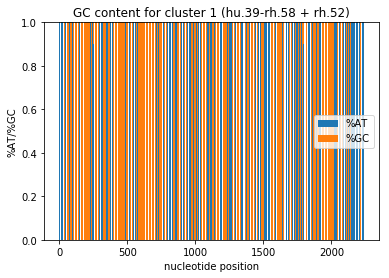

In [94]:
# cluster 1

%matplotlib inline

from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt

record_dict = SeqIO.index("seqs.aligned.fa","fasta")
GC = np.zeros(len(record_dict["rh.52"]))
AT = np.zeros(len(record_dict["rh.52"]))

#cluster 1 list
list_1 = ["hu.39","rh.50", "rh.57", "rh.51", "rh.49", "rh.53", "rh.64", "rh.61", "rh.58", "rh.52"]

for j in range (len(list_1)):
    for i in range (len(record_dict["hu.39"])):
        if record_dict[list_1[j]][i] == "G" or record_dict[list_1[j]][i] == "C":
            GC[i] = GC[i] +1
        elif record_dict[list_1[j]][i] == "A" or record_dict[list_1[j]][i] == "T":
            AT[i] = AT[i] +1
    
total_nt = np.add(GC, AT)
frac_GC = np.divide(GC,total_nt)
frac_AT = np.divide(AT,total_nt)

print(AT)
print(GC)

p1 = plt.bar(range(len(AT)), frac_AT)
p2 = plt.bar(range(len(AT)), frac_GC, bottom=frac_AT)

plt.xlabel("nucleotide position")
plt.ylabel("%AT/%GC")
plt.title("GC content for cluster 1 (hu.39-rh.58 + rh.52)")
plt.legend((p1[0],p2[0]), ("%AT", "%GC"))
plt.show()

#print(record_dict["hu.39"][2])
#print(len(record_dict["rh.52"]))


/usr/local/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


[17. 17.  0. ... 17. 17. 17.]
[ 0.  0. 17. ...  0.  0.  0.]


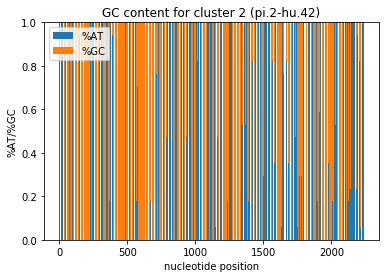

In [95]:
# cluster 2

%matplotlib inline

from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt

record_dict = SeqIO.index("seqs.aligned.fa","fasta")
GC = np.zeros(len(record_dict["rh.52"]))
AT = np.zeros(len(record_dict["rh.52"]))

#cluster 2 list
list_1 = ["pi.2", "pi.3", "pi.1", "rh.10", "bb.1", "bb.2", "hu.17", "hu.6", "rh.2","rh.40","hu.67","hu.37","hu.40","hu.66","hu.41","rh.38","hu.42"]

for j in range (len(list_1)):
    for i in range (len(record_dict["hu.39"])):
        if record_dict[list_1[j]][i] == "G" or record_dict[list_1[j]][i] == "C":
            GC[i] = GC[i] +1
        elif record_dict[list_1[j]][i] == "A" or record_dict[list_1[j]][i] == "T":
            AT[i] = AT[i] +1
    
total_nt = np.add(GC, AT)
frac_GC = np.divide(GC,total_nt)
frac_AT = np.divide(AT,total_nt)

print(AT)
print(GC)

p1 = plt.bar(range(len(AT)), frac_AT)
p2 = plt.bar(range(len(AT)), frac_GC, bottom=frac_AT)

plt.xlabel("nucleotide position")
plt.ylabel("%AT/%GC")
plt.title("GC content for cluster 2 (pi.2-hu.42)")
plt.legend((p1[0],p2[0]), ("%AT", "%GC"))
plt.show()

/usr/local/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


[17. 17.  0. ... 17. 17. 17.]
[ 0.  0. 17. ...  0.  0.  0.]


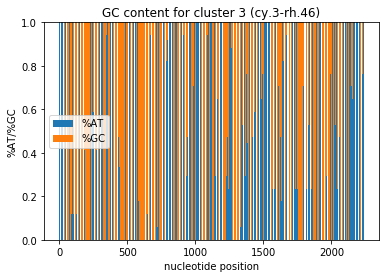

In [96]:
# cluster 3

%matplotlib inline

from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt

record_dict = SeqIO.index("seqs.aligned.fa","fasta")
GC = np.zeros(len(record_dict["rh.52"]))
AT = np.zeros(len(record_dict["rh.52"]))

#cluster 3 list
list_1 = ["cy.3","cy.6", "cy.4","cy.5","rh.13", "rh.35", "rh.36","rh.37", "cy.2","rh.54","rh.55","rh.48","rh.62","hu.43","hu.48","hu.44","hu.46"]

for j in range (len(list_1)):
    for i in range (len(record_dict["hu.39"])):
        if record_dict[list_1[j]][i] == "G" or record_dict[list_1[j]][i] == "C":
            GC[i] = GC[i] +1
        elif record_dict[list_1[j]][i] == "A" or record_dict[list_1[j]][i] == "T":
            AT[i] = AT[i] +1
    
total_nt = np.add(GC, AT)
frac_GC = np.divide(GC,total_nt)
frac_AT = np.divide(AT,total_nt)

print(AT)
print(GC)

p1 = plt.bar(range(len(AT)), frac_AT)
p2 = plt.bar(range(len(AT)), frac_GC, bottom=frac_AT)

plt.xlabel("nucleotide position")
plt.ylabel("%AT/%GC")
plt.title("GC content for cluster 3 (cy.3-rh.46)")
plt.legend((p1[0],p2[0]), ("%AT", "%GC"))
plt.show()

/usr/local/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/usr/local/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide


[4. 4. 0. ... 4. 4. 4.]
[0. 0. 4. ... 0. 0. 0.]


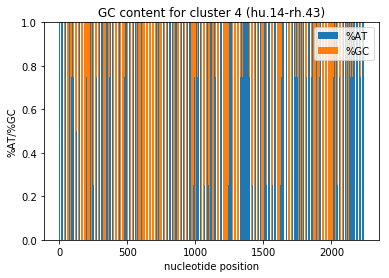

In [97]:
# cluster 4

%matplotlib inline

from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt

record_dict = SeqIO.index("seqs.aligned.fa","fasta")
GC = np.zeros(len(record_dict["rh.52"]))
AT = np.zeros(len(record_dict["rh.52"]))

#cluster 4 list
list_1 = ["hu.14","hu.31","hu.32","rh.43"]

for j in range (len(list_1)):
    for i in range (len(record_dict["hu.39"])):
        if record_dict[list_1[j]][i] == "G" or record_dict[list_1[j]][i] == "C":
            GC[i] = GC[i] +1
        elif record_dict[list_1[j]][i] == "A" or record_dict[list_1[j]][i] == "T":
            AT[i] = AT[i] +1
    
total_nt = np.add(GC, AT)
frac_GC = np.divide(GC,total_nt)
frac_AT = np.divide(AT,total_nt)

print(AT)
print(GC)

p1 = plt.bar(range(len(AT)), frac_AT)
p2 = plt.bar(range(len(AT)), frac_GC, bottom=frac_AT)

plt.xlabel("nucleotide position")
plt.ylabel("%AT/%GC")
plt.title("GC content for cluster 4 (hu.14-rh.43)")
plt.legend((p1[0],p2[0]), ("%AT", "%GC"))
plt.show()

The above plots for clusters 1-4 show that in each major cluster, there tends to be a strong AT or CG preference at each position. It also seems that there are some regions that seem to have a cluster of one kinf of sequence. For example, in cluster 4, there is a band of blue that indicates there is a cluster of AT sequences around position 1300. 

[Text(0,0,'cluster 1'),
 Text(0,0,'cluster 2'),
 Text(0,0,'cluster 3'),
 Text(0,0,'cluster 4'),
 Text(0,0,'all clusters')]

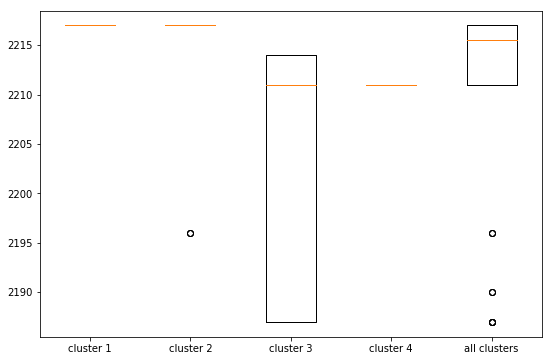

In [98]:
%matplotlib inline

from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
from pylab import hold

record_dict = SeqIO.index("seqs.fa","fasta")
#cluster 1 list
list_1 = ["hu.39","rh.50", "rh.57", "rh.51", "rh.49", "rh.53", "rh.64", "rh.61", "rh.58", "rh.52"]

lengths_1 = np.zeros(len(list_1))

for i in range(len(list_1)):
    lengths_1[i]=len(record_dict[list_1[i]])


#cluster 2 list
list_2 = ["pi.2", "pi.3", "pi.1", "rh.10", "bb.1", "bb.2", "hu.17", "hu.6", "rh.2","rh.40","hu.67","hu.37","hu.40","hu.66","hu.41","rh.38","hu.42"]

lengths_2 = np.zeros(len(list_2))

for i in range(len(list_2)):
    lengths_2[i]=len(record_dict[list_2[i]])
    
    
#cluster 3 list
list_3 = ["cy.3","cy.6", "cy.4","cy.5","rh.13", "rh.35", "rh.36","rh.37", "cy.2","rh.54","rh.55","rh.48","rh.62","hu.43","hu.48","hu.44","hu.46"]

lengths_3 = np.zeros(len(list_3))

for i in range(len(list_3)):
    lengths_3[i]=len(record_dict[list_3[i]])
    
    
    
    
#cluster 4 list
list_4 = ["hu.14","hu.31","hu.32","rh.43"]

lengths_4 = np.zeros(len(list_4))

for i in range(len(list_4)):
    lengths_4[i]=len(record_dict[list_4[i]])
    
    
lengths_all = np.concatenate((lengths_1, lengths_2, lengths_3, lengths_4), axis=None)
    


plotted_data = [lengths_1, lengths_2, lengths_3, lengths_4, lengths_all]
fig = plt.figure (1, figsize=(9,6))
ax = fig.add_subplot(111)

bp = ax.boxplot(plotted_data)
ax.set_xticklabels(["cluster 1","cluster 2", "cluster 3", "cluster 4", "all clusters"])

Above are the box-and-whisker plots for the clusters of sequences previously defined, using the sequences from seqs.fa (since the sequences in seqs.aligned.fa are aligned they would, by default, have the same length). Although the box-and-whisker plots look strange, it does make some sense: sequences that are closely related (in the same cluster) should have roughly the same length. If we plot all the clusters together, we see that the box-and-whisker plot does have more of a spread and looks more like a traditional plot. However, the distribution remains descretized because most sequences are of two given lengths (2217 and 2195). In this case, the box plots may not be the best way to analyze the data, but it does give a strong visualization that there are certain sequence lengths that are preferred in these clusters.